# Data analysis notebook 
This notebook countains analysis report of the analamanga temperature, rainfall and CO2 emission dataset 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Datasets importation

Here we are importing weather parameters datasets

In [3]:
meteo = pd.read_excel("mto.xlsx",sheet_name = "Sheet1")
meteo.head()

,date,RR(mm),MSLP(Hpa),FF10(Kt),FF200(Kt),FF700(Kt),FF850(Kt),RH500,RH700,Tmin(°C),Tmax(°C),Tmoy(°C)
0,1993-01-01,3.6,1017.4,2.716537,25.851690,5.512872,3.395640,27.92494,73.43215,17.7,27.8,21.6
1,1993-01-02,6.7,1015.5,4.338355,8.151109,5.183357,7.844608,45.49866,78.35376,17.9,27.5,21.9
2,1993-01-03,16.6,1013.2,4.438660,15.707470,10.183650,8.940825,68.28097,82.58710,16.9,26.2,20.7
3,1993-01-04,1.1,1013.7,7.050377,25.368320,5.328906,12.155930,41.93768,77.08398,16.6,23.9,19.8
4,1993-01-05,1.1,1015.7,6.355413,27.674650,5.668970,11.031340,45.03161,76.19373,17.3,25.1,20.6


Now we are importing greenhouse gases dataset

In [5]:
ghg = pd.read_csv("ghg.csv")
ghg.head()

,Unnamed: 0,iso,Country/Region,unit,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,135,MDG,Madagascar,tCO2e per capita,0.08,0.07,0.07,0.08,0.09,0.1,...,0.14,0.13,0.13,0.13,0.16,0.14,0.15,0.14,0.15,0.15


# Dataset cleaning
Now we are cleaning the meteo dataset, know that we only need the temperature and rainfall column, so we are dropping all the unnecessary column.

In [6]:
meteo = meteo.dropna()
selected = meteo[["date","RR(mm)","Tmin(°C)","Tmax(°C)"]]
selected.head()

,date,RR(mm),Tmin(°C),Tmax(°C)
0,1993-01-01,3.6,17.7,27.8
1,1993-01-02,6.7,17.9,27.5
2,1993-01-03,16.6,16.9,26.2
3,1993-01-04,1.1,16.6,23.9
4,1993-01-05,1.1,17.3,25.1


And here we are cleaning the greenhouse gazes dataset. Note that we only need data from 1993 to 2022 and convert into total emission of the Analamanga region by multiplying with the total population number.

In [7]:
indexes = np.arange(1993,2023).astype("str")
population  = 3.5 #this is the average population number of the analamanga region
emissions =((np.array(ghg[indexes]).T)*3.5).reshape((30,))
emissions

array([0.28 , 0.315, 0.315, 0.315, 0.35 , 0.385, 0.385, 0.42 , 0.35 ,
       0.245, 0.35 , 0.35 , 0.315, 0.315, 0.315, 0.315, 0.28 , 0.315,
       0.385, 0.42 , 0.49 , 0.455, 0.455, 0.455, 0.56 , 0.49 , 0.525,
       0.49 , 0.525, 0.525])

# Data analysis 
Now we are plotting the relation bewteen each meteo parameter and rainfall

Here we are exploring the evolution of annual temperature and rainfall for the region with plots. 
Here below is a function that can be used in each parameter analysis and finding evolution and relation with years.

In [39]:

#getting all the needed information
def get_information(parameter,title = None):
    #trendline configuration
    model = LinearRegression()
    model.fit(indexes.astype("int64").reshape((30,1)),parameter)
    trend = model.predict(indexes.astype("int64").reshape((30,1)))
    #plotting the distribution
    data = pd.DataFrame({"y" : parameter,"x" : indexes})
    sns.lineplot(data = data,x = "x",y = "y",lw = 6)
    plt.ylabel(title)
    sns.lineplot(x = indexes,y = trend,lw = 6)
    plt.title("Annual {} distribution for the Analamanga region(1993-2022)".format(title))
    plt.ylabel(title)
    plt.xlabel("Years")
    #additionnal information
    mean = np.mean(parameter)
    std = np.std(parameter)
    coeff,p_value = pearsonr(parameter,indexes.astype("int64"))
    maximum = np.max(parameter)
    minimum = np.min(parameter)
    print("Mean value of {}".format(title),mean)
    print("Standart deviation :",std)
    print("Minimum in ",1993 + np.argmin(parameter))
    print("Value :",minimum)
    print("Maximum in",1993+np.argmax(parameter))
    print("Value",maximum) 
    print("Variation with time of {}".format(title),model.coef_)
    if p_value > 0.05:
        print("Absence of relation with time")
        print("Correlation coefficient",coeff)
        
    else:
        print("Presence of relation with time")
        print("Correlation coefficient",coeff)

Now we are getting all the annual temperature and analyze it.

/tmp/ipykernel_27542/218663151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected["mean_temperature"] = (selected["Tmax(°C)"]+selected["Tmin(°C)"])/2


Mean value of mean temperature 18.698874853407187
Standart deviation : 0.32309622989625136
Minimum in  1993
Value : 18.046712328767125
Maximum in 2019
Value 19.50849315068493
Variation with time of mean temperature [0.02702388]
Presence of relation with time
Correlation coefficient 0.7239441216816386


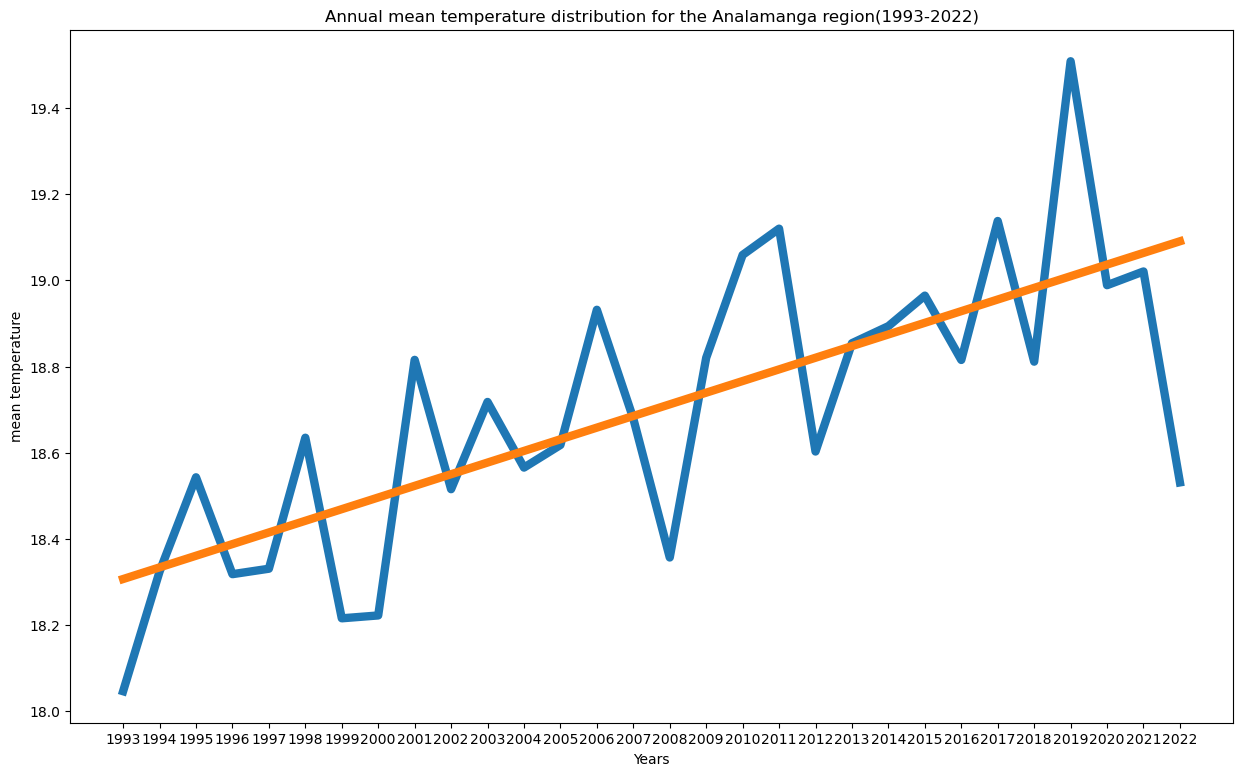

In [40]:
plt.figure(figsize = (15,9))
selected["mean_temperature"] = (selected["Tmax(°C)"]+selected["Tmin(°C)"])/2
temperature = selected["mean_temperature"].groupby(by = selected["date"].dt.year).mean()
get_information(temperature,"mean temperature")


Now we are doing the same for rainfall

Mean value of Rainfall cumul 1096.1733333333332
Standart deviation : 221.85732342105717
Minimum in  2006
Value : 623.1
Maximum in 2015
Value 1692.4
Variation with time of Rainfall cumul [-1.17023359]
Absence of relation with time
Correlation coefficient -0.04565496503763268


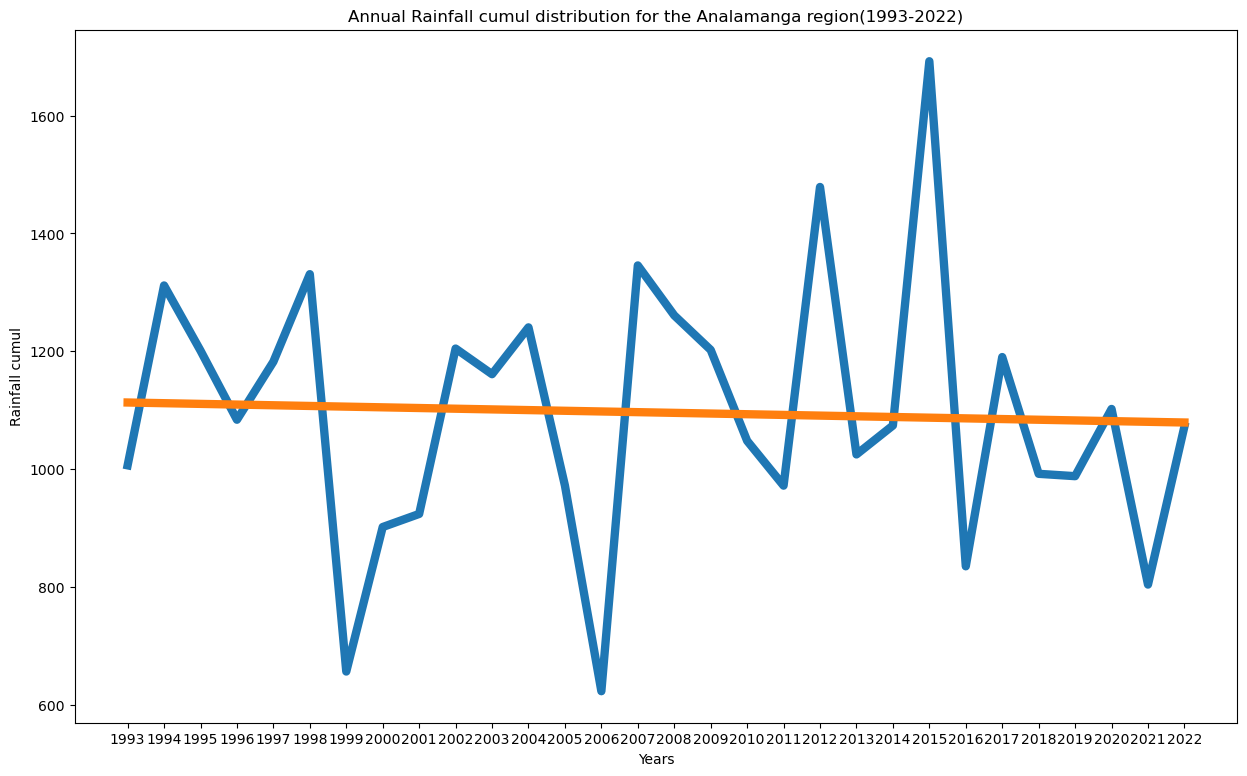

In [41]:
plt.figure(figsize = (15,9))
rainfall = selected["RR(mm)"].groupby(by = selected["date"].dt.year).sum()
get_information(rainfall,"Rainfall cumul")

Now it's the turn of CO2 greenhouse gaz to be analyzed.

Mean value of CO2 emission 0.3896666666666667
Standart deviation : 0.08655377262462659
Minimum in  2002
Value : 0.24500000000000002
Maximum in 2017
Value 0.56
Variation with time of CO2 emission [0.00773971]
Presence of relation with time
Correlation coefficient 0.7739768185368064


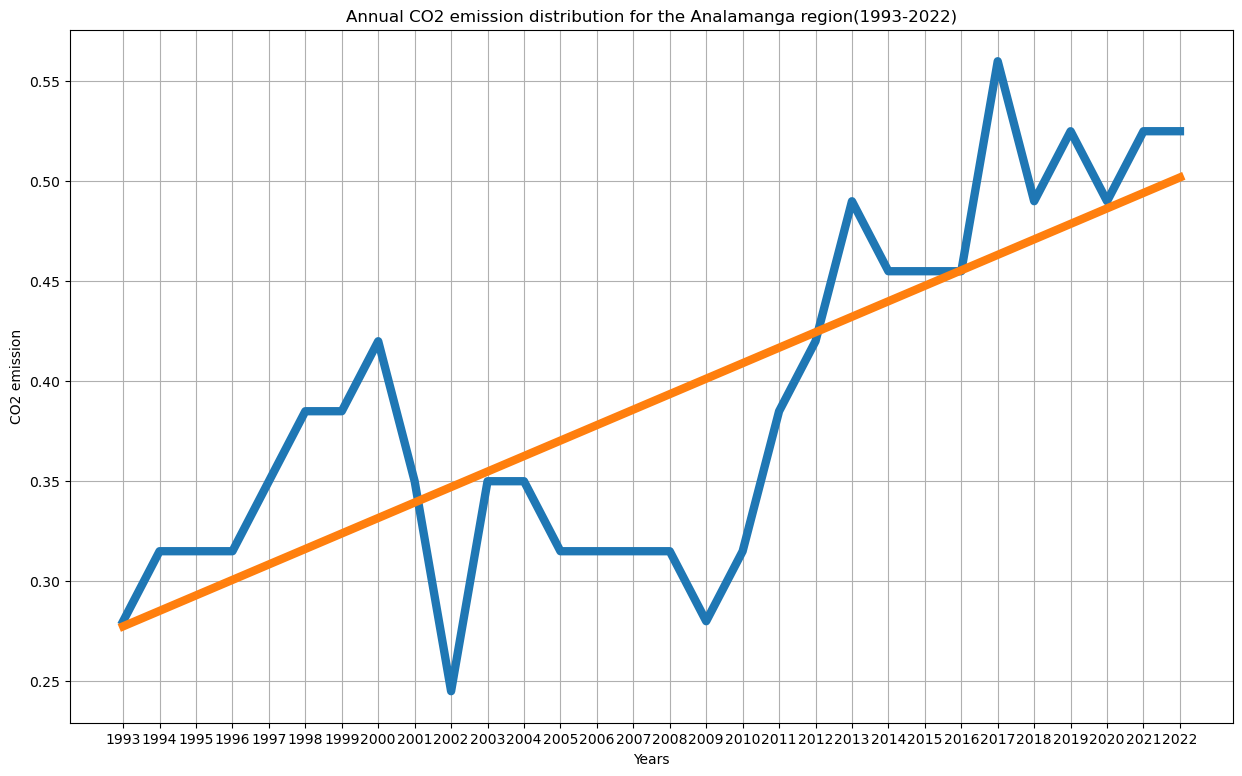

In [42]:
plt.figure(figsize = (15,9))
plt.grid()
get_information(emissions,"CO2 emission")

# Relation between parameters 

Here we are finding relations between temperature and CO2 greenhouse gaz emission, also the reation between CO2 and rainfall.
Here below is the function that will be used 

In [43]:
def relation(y,y_title = None):
    coeff1,p1 = pearsonr(emissions,y)
    if p1 > 0.05:
        print("Absence of relation with carbon dioxyde emission")
        print("Correlation coefficient",coeff1)
        print(f"P vaue : {p1}")
    
    else:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
            print("Presence of relation with carbon dioxyde emission")
            print("Correlation coefficient",coeff1)
            print(f"P value : {p1}")
            
    fig,axis1 = plt.subplots(figsize = (15,9))
    plt.grid()
    axis1.set_xlabel("Year")
    axis1.set_ylabel("Carbon dioxyde emission (MtCO2equ)")
    axis1.plot(indexes,emissions,lw = 6,color = "blue",label = "Carbon dioxyde emission[MtCO2equ]")
    plt.legend(loc = "upper left",fontsize = 10)
    axis2 = axis1.twinx()
    axis2.set_ylabel(y_title)
    axis2.plot(indexes,y,lw = 6,label = y_title)
    plt.legend(loc = "lower right",fontsize = 10)

First let's find what will be the evolution of temperature alongside of the CO2greenhouse gaz and validate the relation using the Pearson correlation coefficient.

Presence of relation with carbon dioxyde emission
Correlation coefficient 0.5221600227052852
P value : 0.0030786566761555377


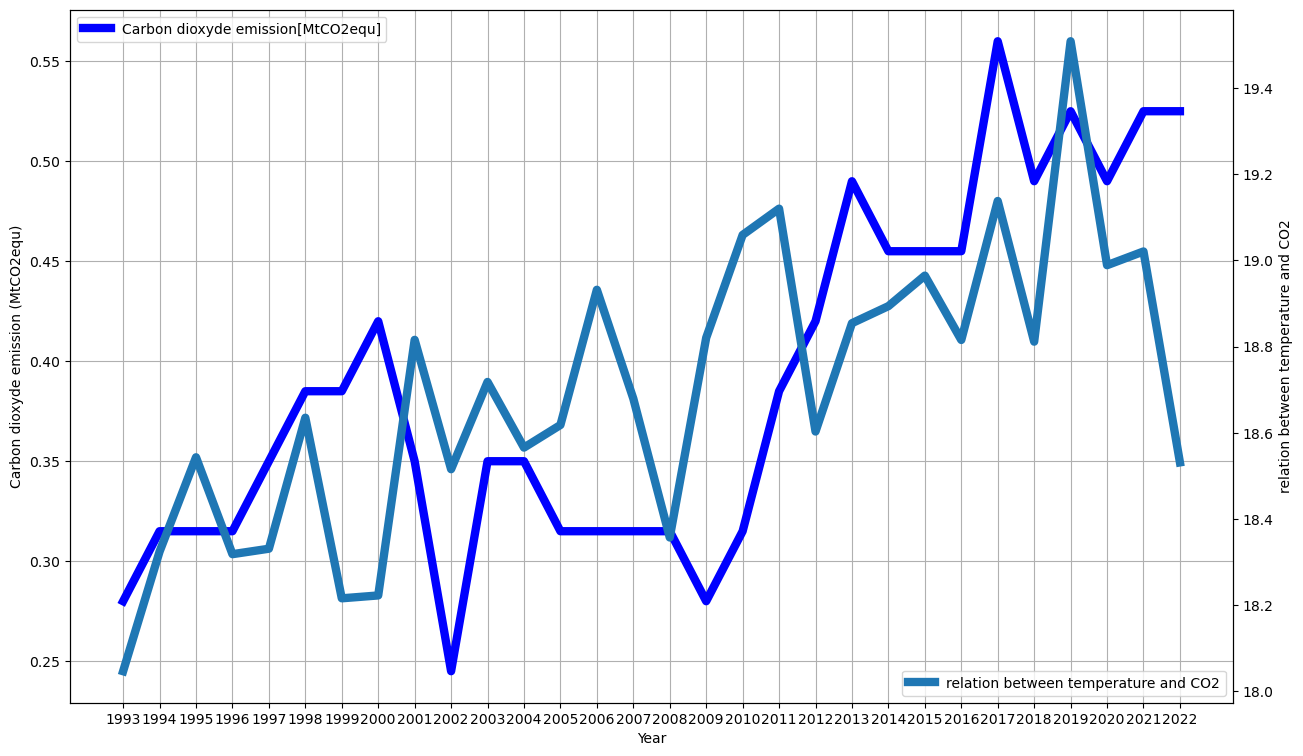

In [32]:
relation(temperature,"relation between temperature and CO2")

We found a Pearson correlation coefficient with a value of 0.52 and a p value less than 0.05, so the relation is reel.

After finding the relation between temperature and CO2, we are doing the same with rainfall and CO2 emission.

Absence of relation with carbon dioxyde emission
Correlation coefficient -0.1020995462809817
P vaue : 0.5913599058711975


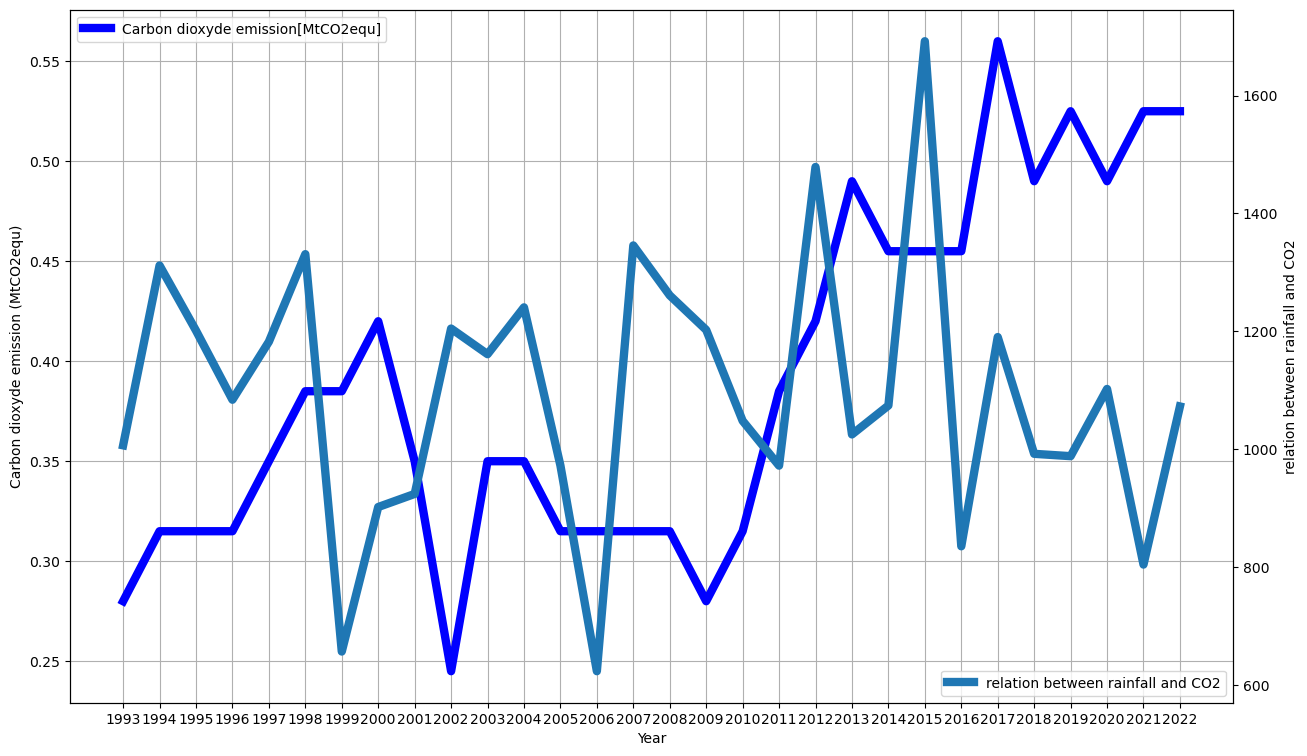

In [38]:
relation(rainfall,"relation between rainfall and CO2")

The pearson correlation coefficient is -0.1 with a p-value more than 0.05, so the relation is not statistically true .